In [1]:

import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [14]:
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p,x):
    f = sp.poly1d(p)
    return f(x)

def residuals_func(p,x,y):
    ret = fit_func(p,x)-y
    return ret


In [45]:
import numpy as np
a = [2,0,0]

f = np.poly1d(a)
print(f)
print(f([2,3,4]))

   2
2 x
[ 8 18 32]


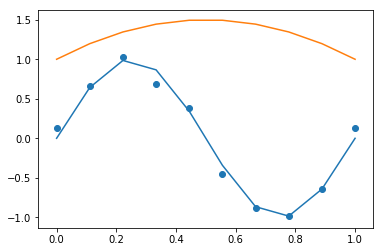

In [35]:
x = np.linspace(0,1,10)
#标准正弦
y_sin = real_func(x)
#加上正态分布的噪声
y_real = [np.random.normal(0,0.1)+t for t in y_sin]
#多项式
param = [-2,2,1]
p = fit_func(param,x)
y_p = p

#绘制图像
plt.plot(x,y_sin)
plt.scatter(x,y_real)
plt.plot(x,y_p)

In [36]:
def fitting(M=0):
    
    p_init = np.random.rand(M + 1)
    p_lsq = leastsq(residuals_func,p_init,args=(x,y_real))
    print(p_lsq[0])
    
    plt.plot(x,real_func(x),label='real')
    plt.plot(x,fit_func(p_lsq[0],x),label='fit')
    plt.plot(x,y_real,'bo',label='noise')
    plt.legend()

[0.00672321]


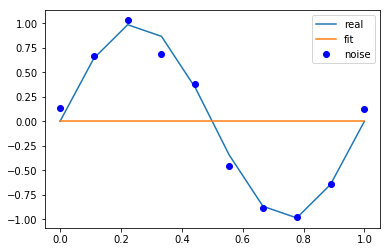

In [37]:
fitting(0)

[-1.35028235  0.68186439]


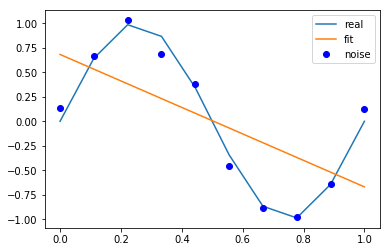

In [38]:
fitting(1)

[ 20.76277127 -30.39727564   9.71967287   0.07478805]


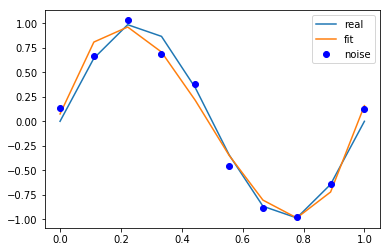

In [39]:
fitting(3)

[-3.69308060e+04  1.69227606e+05 -3.26246802e+05  3.43641799e+05
 -2.14782259e+05  8.08653240e+04 -1.77025067e+04  2.01122403e+03
 -8.35867620e+01  1.34131162e-01]


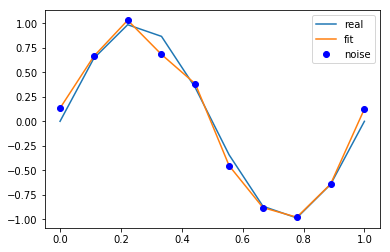

In [40]:
fitting(9)